I want to generate permutations of valid secret Santa networks, noting that you aren't allowed to have yourself as your own secret Santa! 

(This function is named derangement because that is the mathematical term for a permutation of a set with no fixed points)

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from itertools import permutations

def derangement(n):
    derangement = []
    
    permutations_list = permutations(range(n))
    
    for permutation in permutations_list:
        if all( giver != recepient for giver, recepient in enumerate(permutation)):
            derangement.append(tuple(zip(range(n), permutation)))
            
    return derangement

Example for n = 4:

In [76]:
derangement(4)

[((0, 1), (1, 0), (2, 3), (3, 2)),
 ((0, 1), (1, 2), (2, 3), (3, 0)),
 ((0, 1), (1, 3), (2, 0), (3, 2)),
 ((0, 2), (1, 0), (2, 3), (3, 1)),
 ((0, 2), (1, 3), (2, 0), (3, 1)),
 ((0, 2), (1, 3), (2, 1), (3, 0)),
 ((0, 3), (1, 0), (2, 1), (3, 2)),
 ((0, 3), (1, 2), (2, 0), (3, 1)),
 ((0, 3), (1, 2), (2, 1), (3, 0))]

So for example, the first item returned above

In [77]:
derangement(4)[0]

((0, 1), (1, 0), (2, 3), (3, 2))

Says that:

- person 0 gives a gift to person 1
- person 1 gives a gift to person 0
- person 2 gives a gift to person 3
- person 3 gives a gift to person 2

In this case, there are two distinct cycles. Pictured below:

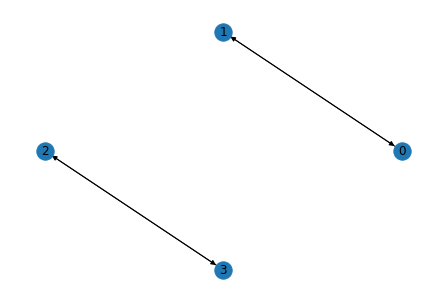

In [139]:
G = nx.DiGraph()
G.add_nodes_from(range(4))
G.add_edges_from(derangement(4)[0])
nx.draw_circular(G, with_labels = True)

It could also be a chain of four like:

In [71]:
derangement(4)[1]

{0: 1, 1: 2, 2: 3, 3: 0}

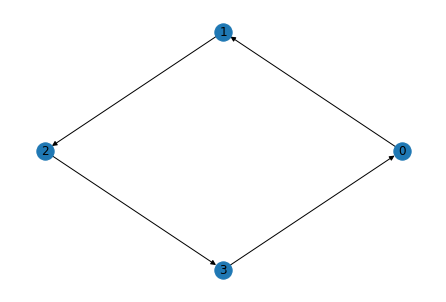

In [140]:
G = nx.DiGraph()
G.add_nodes_from(range(4))
G.add_edges_from(derangement(4)[1])
nx.draw_circular(G, with_labels = True)

Let's write a function that determines how many disjoint cycles exist:

In [143]:
import networkx as nx

def cycle(n, plot = False):
    derange = derangement(n)
    
    cycle_list = []
    
    for permutation in derange:
        # Create Directed Graph
        G = nx.DiGraph()

        # Add a list of nodes:
        G.add_nodes_from(range(4))

        # Add a list of edges:
        G.add_edges_from(permutation)
        
        disjoint = len(list(nx.simple_cycles(G)))
        cycle_list.append(disjoint)
        
        if plot:
            print(f"{disjoint} disjoint cycles")
            nx.draw_circular(G, with_labels = True)
            plt.show()
        
    return cycle_list

Again, an example for the 9 possibilities for n = 4:

2 disjoint cycles


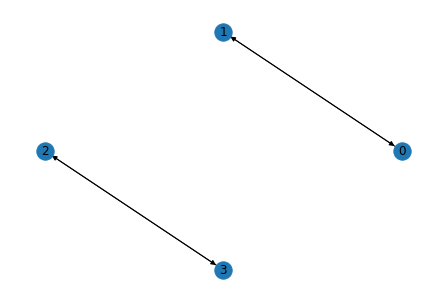

1 disjoint cycles


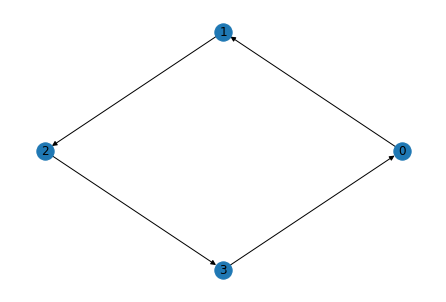

1 disjoint cycles


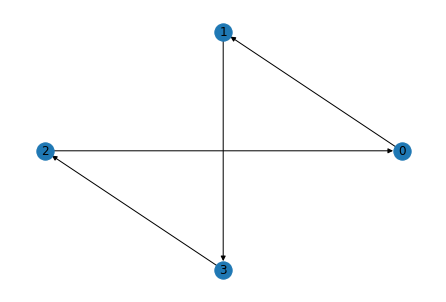

1 disjoint cycles


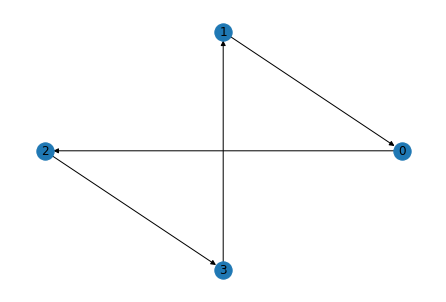

2 disjoint cycles


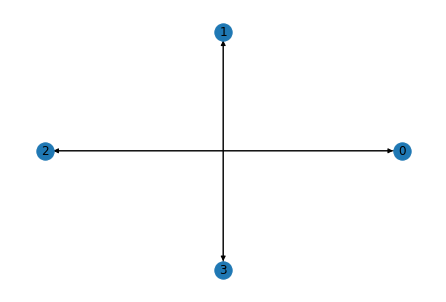

1 disjoint cycles


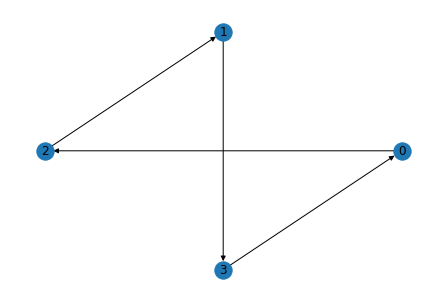

1 disjoint cycles


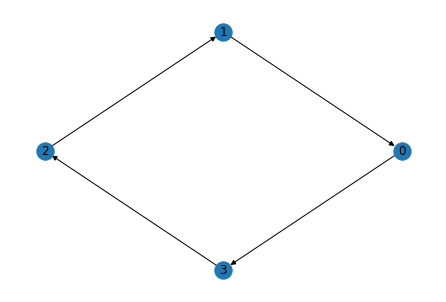

1 disjoint cycles


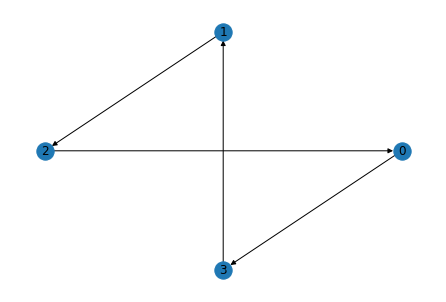

2 disjoint cycles


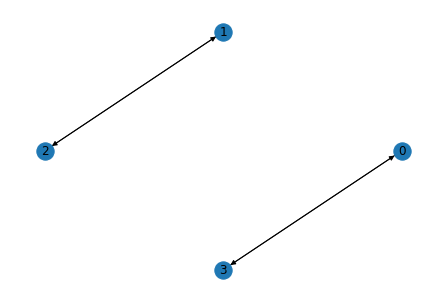

[2, 1, 1, 1, 2, 1, 1, 1, 2]

In [144]:
cycle(4, plot = True)

Let's see what these probabilities of number of cycles is for each network size. This grows very quickly, so I'll keep it to a small number:

In [99]:
from collections import Counter

In [124]:
for n in range(2, 10):
    cycles = cycle(n)
    count = Counter(cycles).items()
    
    print(f"Network of {n} participants:")
    for key, value in count:
        print(f"{key} disjoint cycles happen with probability {value/len(cycles):.2f}")
        
    print("\n")

Network of 2 participants:
1 disjoint cycles happen with probability 1.00


Network of 3 participants:
1 disjoint cycles happen with probability 1.00


Network of 4 participants:
2 disjoint cycles happen with probability 0.33
1 disjoint cycles happen with probability 0.67


Network of 5 participants:
2 disjoint cycles happen with probability 0.45
1 disjoint cycles happen with probability 0.55


Network of 6 participants:
3 disjoint cycles happen with probability 0.06
2 disjoint cycles happen with probability 0.49
1 disjoint cycles happen with probability 0.45


Network of 7 participants:
3 disjoint cycles happen with probability 0.11
2 disjoint cycles happen with probability 0.50
1 disjoint cycles happen with probability 0.39


Network of 8 participants:
4 disjoint cycles happen with probability 0.01
3 disjoint cycles happen with probability 0.16
2 disjoint cycles happen with probability 0.49
1 disjoint cycles happen with probability 0.34


Network of 9 participants:
4 disjoint cycles 